# Petru și Lupul: Introducere în Învățarea prin Recompensă

În acest tutorial, vom învăța cum să aplicăm învățarea prin recompensă la o problemă de găsire a traseului. Contextul este inspirat de povestea muzicală [Petru și Lupul](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) a compozitorului rus [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Este o poveste despre tânărul pionier Petru, care curajos iese din casă spre poiana din pădure pentru a urmări un lup. Vom antrena algoritmi de învățare automată care îl vor ajuta pe Petru să exploreze zona înconjurătoare și să construiască o hartă optimă de navigare.

Mai întâi, să importăm câteva biblioteci utile:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Prezentare generală a Învățării prin Recompensă

**Învățarea prin Recompensă** (RL) este o tehnică de învățare care ne permite să învățăm un comportament optim al unui **agent** într-un anumit **mediu**, rulând numeroase experimente. Un agent în acest mediu ar trebui să aibă un **scop**, definit printr-o **funcție de recompensă**.

## Mediul

Pentru simplitate, să considerăm lumea lui Peter ca fiind o tablă pătrată de dimensiune `width` x `height`. Fiecare celulă din această tablă poate fi:
* **teren**, pe care Peter și alte creaturi pot merge
* **apă**, pe care, evident, nu poți merge
* **un copac** sau **iarbă** - un loc unde te poți odihni
* **un măr**, care reprezintă ceva ce Peter ar fi bucuros să găsească pentru a se hrăni
* **un lup**, care este periculos și ar trebui evitat

Pentru a lucra cu mediul, vom defini o clasă numită `Board`. Pentru a nu aglomera prea mult acest notebook, am mutat tot codul pentru a lucra cu tabla într-un modul separat numit `rlboard`, pe care îl vom importa acum. Poți arunca o privire în acest modul pentru a obține mai multe detalii despre implementarea internă.


Să creăm acum o tablă aleatorie și să vedem cum arată:


In [4]:
# code block 1

## Acțiuni și Politică

În exemplul nostru, scopul lui Peter ar fi să găsească un măr, evitând în același timp lupul și alte obstacole. Definește aceste acțiuni ca un dicționar și asociază-le cu perechi de modificări corespunzătoare ale coordonatelor.


In [5]:
# code block 2

Strategia agentului nostru (Peter) este definită de ceea ce numim **politică**. Să luăm în considerare cea mai simplă politică, numită **plimbare aleatorie**.

## Plimbare aleatorie

Să rezolvăm mai întâi problema noastră implementând o strategie de plimbare aleatorie.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Funcția de Recompensă

Pentru a face politica noastră mai inteligentă, trebuie să înțelegem care mișcări sunt „mai bune” decât altele.


In [8]:
#code block 5

## Învățare Q

Construiește un Q-Table sau un tablou multidimensional. Deoarece tabla noastră are dimensiunile `width` x `height`, putem reprezenta Q-Table printr-un tablou numpy cu forma `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Treceți tabelul Q la funcția `plot` pentru a vizualiza tabelul pe tablă:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Esența Q-Learning: Ecuația Bellman și Algoritmul de Învățare

Scrie un pseudo-cod pentru algoritmul nostru de învățare:

* Inițializează tabelul Q, Q, cu valori egale pentru toate stările și acțiunile
* Setează rata de învățare $\alpha\leftarrow 1$
* Repetă simularea de mai multe ori
   1. Începe dintr-o poziție aleatorie
   1. Repetă
        1. Selectează o acțiune $a$ în starea $s$
        2. Execută acțiunea mutându-te într-o nouă stare $s'$
        3. Dacă întâlnim condiția de sfârșit de joc sau recompensa totală este prea mică - ieși din simulare  
        4. Calculează recompensa $r$ în noua stare
        5. Actualizează funcția Q conform ecuației Bellman: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Actualizează recompensa totală și scade $\alpha$.

## Exploatare vs. Explorare

Abordarea optimă este să echilibrăm între explorare și exploatare. Pe măsură ce învățăm mai multe despre mediul nostru, vom fi mai predispuși să urmăm ruta optimă, însă, ocazional, să alegem calea neexplorată.

## Implementare în Python

Acum suntem pregătiți să implementăm algoritmul de învățare. Înainte de asta, avem nevoie de o funcție care să transforme numerele arbitrare din tabelul Q într-un vector de probabilități pentru acțiunile corespunzătoare:


In [10]:
# code block 7

Adăugăm o cantitate mică de `eps` la vectorul original pentru a evita împărțirea la 0 în cazul inițial, când toate componentele vectorului sunt identice.

Algoritmul de învățare propriu-zis pe care îl vom rula pentru 5000 de experimente, numite și **epoci**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

După executarea acestui algoritm, tabelul Q ar trebui să fie actualizat cu valori care definesc atractivitatea diferitelor acțiuni la fiecare pas. Vizualizați tabelul aici:


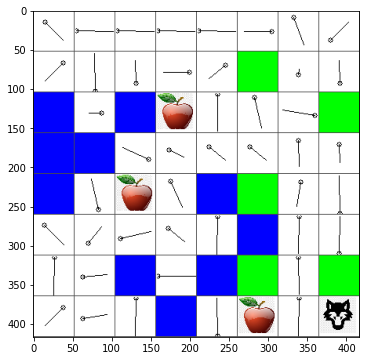

In [43]:
m.plot(Q)

## Verificarea Politicii

Deoarece Q-Table listează „atractivitatea” fiecărei acțiuni în fiecare stare, este destul de simplu să o folosim pentru a defini navigarea eficientă în lumea noastră. În cel mai simplu caz, putem selecta pur și simplu acțiunea corespunzătoare valorii maxime din Q-Table:


In [13]:
# code block 9

2

Dacă încercați codul de mai sus de mai multe ori, este posibil să observați că uneori pur și simplu "se blochează" și trebuie să apăsați butonul STOP din notebook pentru a-l întrerupe.

> **Sarcina 1:** Modificați funcția `walk` pentru a limita lungimea maximă a traseului la un anumit număr de pași (de exemplu, 100) și observați cum codul de mai sus returnează această valoare din când în când.

> **Sarcina 2:** Modificați funcția `walk` astfel încât să nu se întoarcă în locurile în care a fost deja anterior. Acest lucru va preveni ca `walk` să intre în buclă, însă agentul poate ajunge totuși să fie "blocat" într-o locație din care nu poate scăpa.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


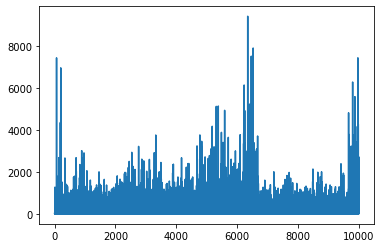

In [57]:
plt.plot(lpath)

## Exercițiu
## O lume mai realistă a lui Petrică și lupul



---

**Declinarea responsabilității**:  
Acest document a fost tradus utilizând serviciul de traducere AI [Co-op Translator](https://github.com/Azure/co-op-translator). Deși depunem eforturi pentru a asigura acuratețea, vă rugăm să aveți în vedere că traducerile automate pot conține erori sau inexactități. Documentul original în limba sa nativă ar trebui considerat sursa autoritară. Pentru informații critice, se recomandă traducerea profesională realizată de un specialist. Nu ne asumăm răspunderea pentru eventualele neînțelegeri sau interpretări greșite care pot apărea din utilizarea acestei traduceri.
